In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance

In [ ]:
df= yfinance.download('ETH-INR')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-11,19455.863281,20815.558594,19430.189453,20504.613281,20504.613281,54884332639
2017-11-12,20505.201172,20796.009766,19451.107422,20063.285156,20063.285156,105134352629
2017-11-13,20005.748047,21399.521484,20005.748047,20722.728516,20722.728516,68170861653
2017-11-14,20725.802734,22287.546875,20725.802734,22081.068359,22081.068359,69957072000
2017-11-15,22102.845703,22277.746094,21523.595703,21754.876953,21754.876953,47161182116


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA

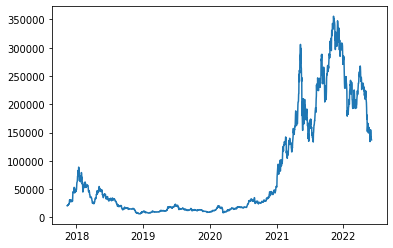

In [ ]:
plt.plot(df.index, df['Adj Close'])

In [ ]:
split_point= math.ceil(0.9*len(df))


In [ ]:
data_train= list(df[:split_point]['Adj Close'])
data_test= list(df[split_point:]['Adj Close'])

In [ ]:
len(data_test)

166

TypeError: ignored

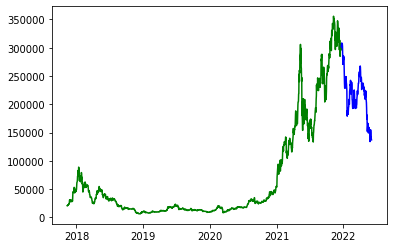

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(df[:split_point]['Adj Close'], c='green', label= "Train_Data")
plt.plot(df[split_point:]['Adj Close'], c='blue', label= "Test_Data")

plt.grid()
plt.xlabel("Date")
plt.ylabel("Closing Prices")

In [ ]:
model_predictions= []
n_test_obser = len(data_test)

In [ ]:
len(data_test)

166

In [ ]:
n_test_obser

166

In [ ]:
for i in range(n_test_obser):
  model= ARIMA(data_train, order=(4,1,0))
  model_fit= model.fit()
  output= model_fit.forecast()
  yhat= list(output[0])[0]
  model_predictions.append(yhat)
  actual_test_value= data_test[i]
  data_train.append(actual_test_value)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1665
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -16801.076
Method:                       css-mle   S.D. of innovations           5835.957
Date:                Sat, 04 Jun 2022   AIC                          33614.152
Time:                        12:15:59   BIC                          33646.657
Sample:                             1   HQIC                         33626.198
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.5160    144.399      0.488      0.625    -212.502     353.534
ar.L1.D.y     -0.0680      0.024     -2.777      0.006      -0.116      -0.020
ar.L2.D.y      0.0077      0.025      0.315      0.7

In [ ]:
len(data_test)

166

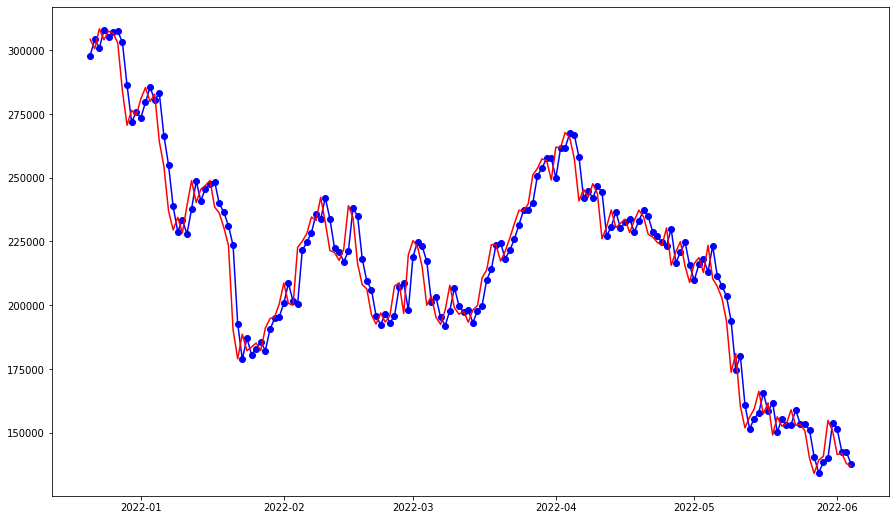

In [ ]:
plt.figure(figsize= (15,9))
plt.grid=True

date_range= df[split_point:].index

plt.plot(date_range, model_predictions, c= 'blue', marker= "o", linestyle= '-', label= 'Ethereum Predicted Price')
plt.plot(date_range, data_test, c= 'red', label= 'Ethereum Actual Price')


In [ ]:
mape= np.mean(np.abs(np.array(model_predictions- np.array(data_test))/np.abs(data_test))) * 100
print(mape)

3.196961649528713
